# Importing Libararies

In [3]:
import os
import json as js
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile

# Load Kaggle credentials
with open('kaggle.json') as f:
    data = js.load(f)
    username = data['username']
    keys = data['key']

# Set Kaggle environment variables
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = keys

# Check for zip file existence
path_to_zip_file = 'house-price-prediction-challenge.zip'
if not os.path.exists(path_to_zip_file):
    print('zip file does not exist, so the file will be downloaded')
    os.system('kaggle datasets download -d anmolkumar/house-price-prediction-challenge')
else:
    print('zip file exists, so it will be used directly\n')

# Read the 'train.csv' file from the zip archive
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    with zip_ref.open('train.csv') as file:
        df = pd.read_csv(file)

# Print shape of the DataFrame
rows, columns = df.shape
print('Rows: ', rows, '\nColumns: ', columns)
df.head()

zip file exists, so it will be used directly

Rows:  29451 
Columns:  12


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df_train = df.drop((["UNDER_CONSTRUCTION", "RERA", "BHK_NO.","POSTED_BY","READY_TO_MOVE","RESALE","BHK_OR_RK","ADDRESS"]),axis=1)
df_train

,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,1300.236407,12.969910,77.597960,55.0
1,1275.000000,12.274538,76.644605,51.0
2,933.159722,12.778033,77.632191,43.0
3,929.921143,28.642300,77.344500,62.5
4,999.009247,22.592200,88.484911,60.5
...,...,...,...,...
29446,2500.000000,27.140626,78.043277,45.0
29447,769.230769,39.945409,-86.150721,16.0
29448,1022.641509,26.928785,75.828002,27.1
29449,927.079009,12.900150,80.227910,67.0


In [5]:
df_train.isnull().sum()

SQUARE_FT                0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

Text(0, 0.5, 'TARGET(PRICE_IN_LACS)')

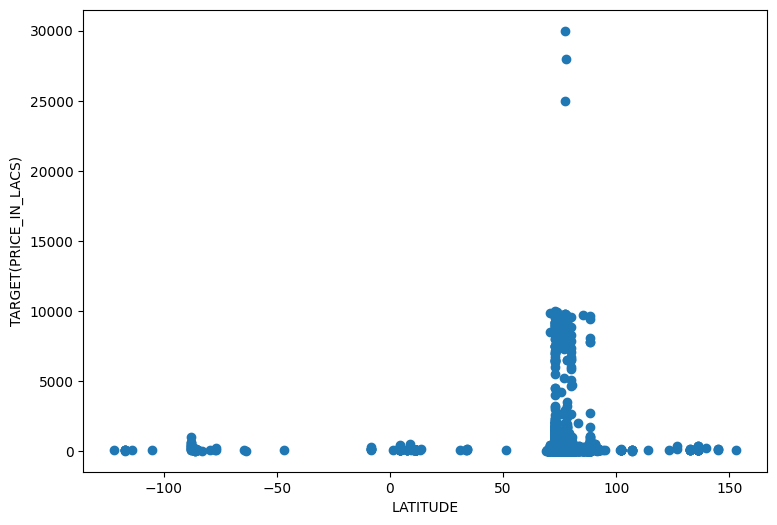

In [8]:
plt.figure(figsize=(30,6))
plt.subplot(133)
plt.scatter(df_train['LATITUDE'], df_train['TARGET(PRICE_IN_LACS)'])
plt.xlabel('LATITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')

